# Prepare train and test data

In [8]:

import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Logistic Regression based on Python OOP API

In [9]:
class LogisticRegressionGD:
  def __init__(self, eta=0.05, n_iter=100, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = y - output

      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()

      cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
      self.cost_.append(cost)

    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, z):
    return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, 0)

# Train model

In [10]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lgrd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)

lgrd.fit(X_train_01_subset, y_train_01_subset)

# Test model and plot result

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


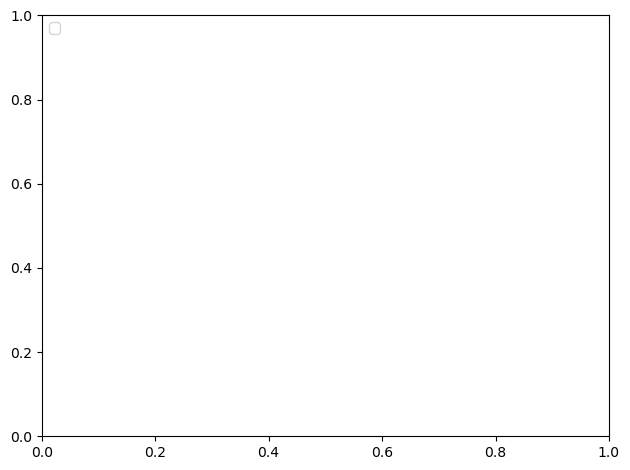

In [12]:
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)

  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl)

  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1], alpha=1.0, linewidths=1, marker='o', s=100, label='test')

plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lgrd)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()